# 1 - About the Project

### The dataset

The dataset contains 33 variables describing several information regarding breast tumours. The diagnosis is given as a binary variable in which M means malignant tumor and B means benign tumor.

## 2 - Importing the Libraries

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

#Data Analysis and Processing

import numpy as np 
import pandas as pd 


# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 14})
import branca.colormap as cm


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import torch.nn as nn
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

/kaggle/input/breast-cancer/breast-cancer.csv


## 3 - Loading the Data and EDA

In [2]:
df = pd.read_csv('../input/breast-cancer/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 33)

#### Checking for null data and duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Deleting unnecessary data

In [9]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


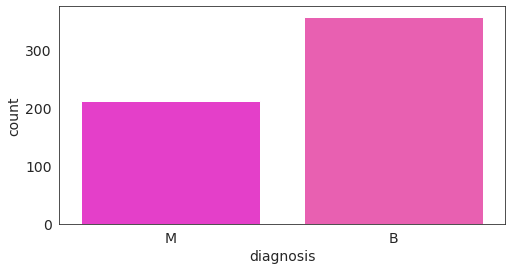

In [12]:
sns.set_style("white")
sns.set_palette("spring")
plt.figure(figsize = (8,4))
sns.countplot(df['diagnosis']);


In [13]:
# Values of 'Benign' and 'Malignant' cancer cells
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

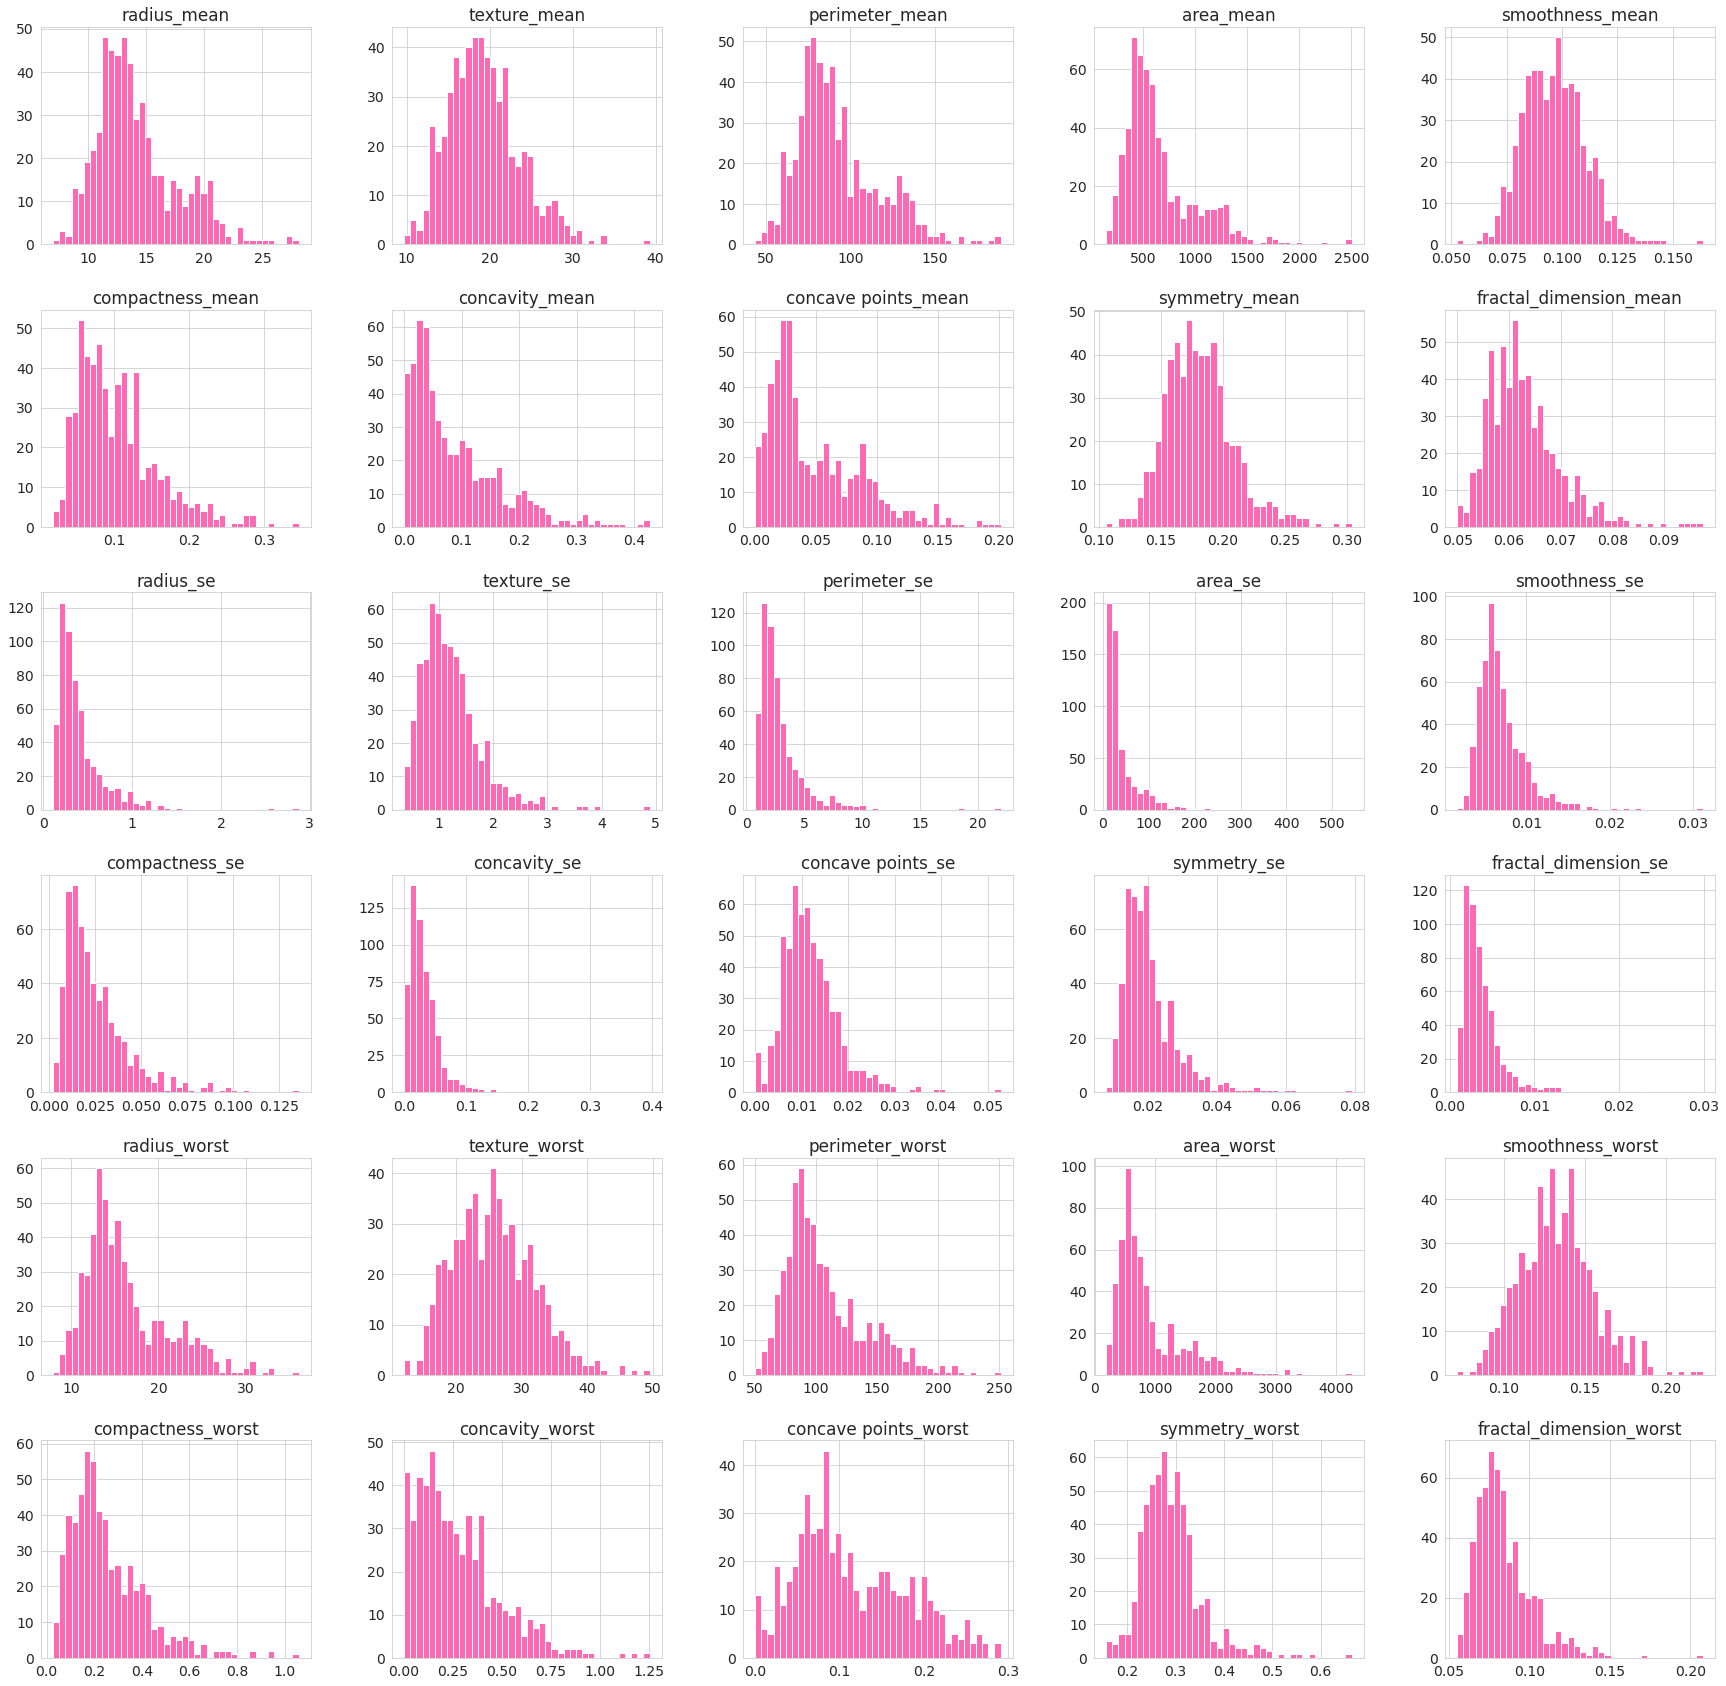

In [14]:
#sns.set_palette("pink")
#plt.rcParams.update({'font.size': 12})
sns.set_style("whitegrid")
df.hist(bins=40, figsize=(30, 30), color='hotpink');

Checking the correlation between the variables:

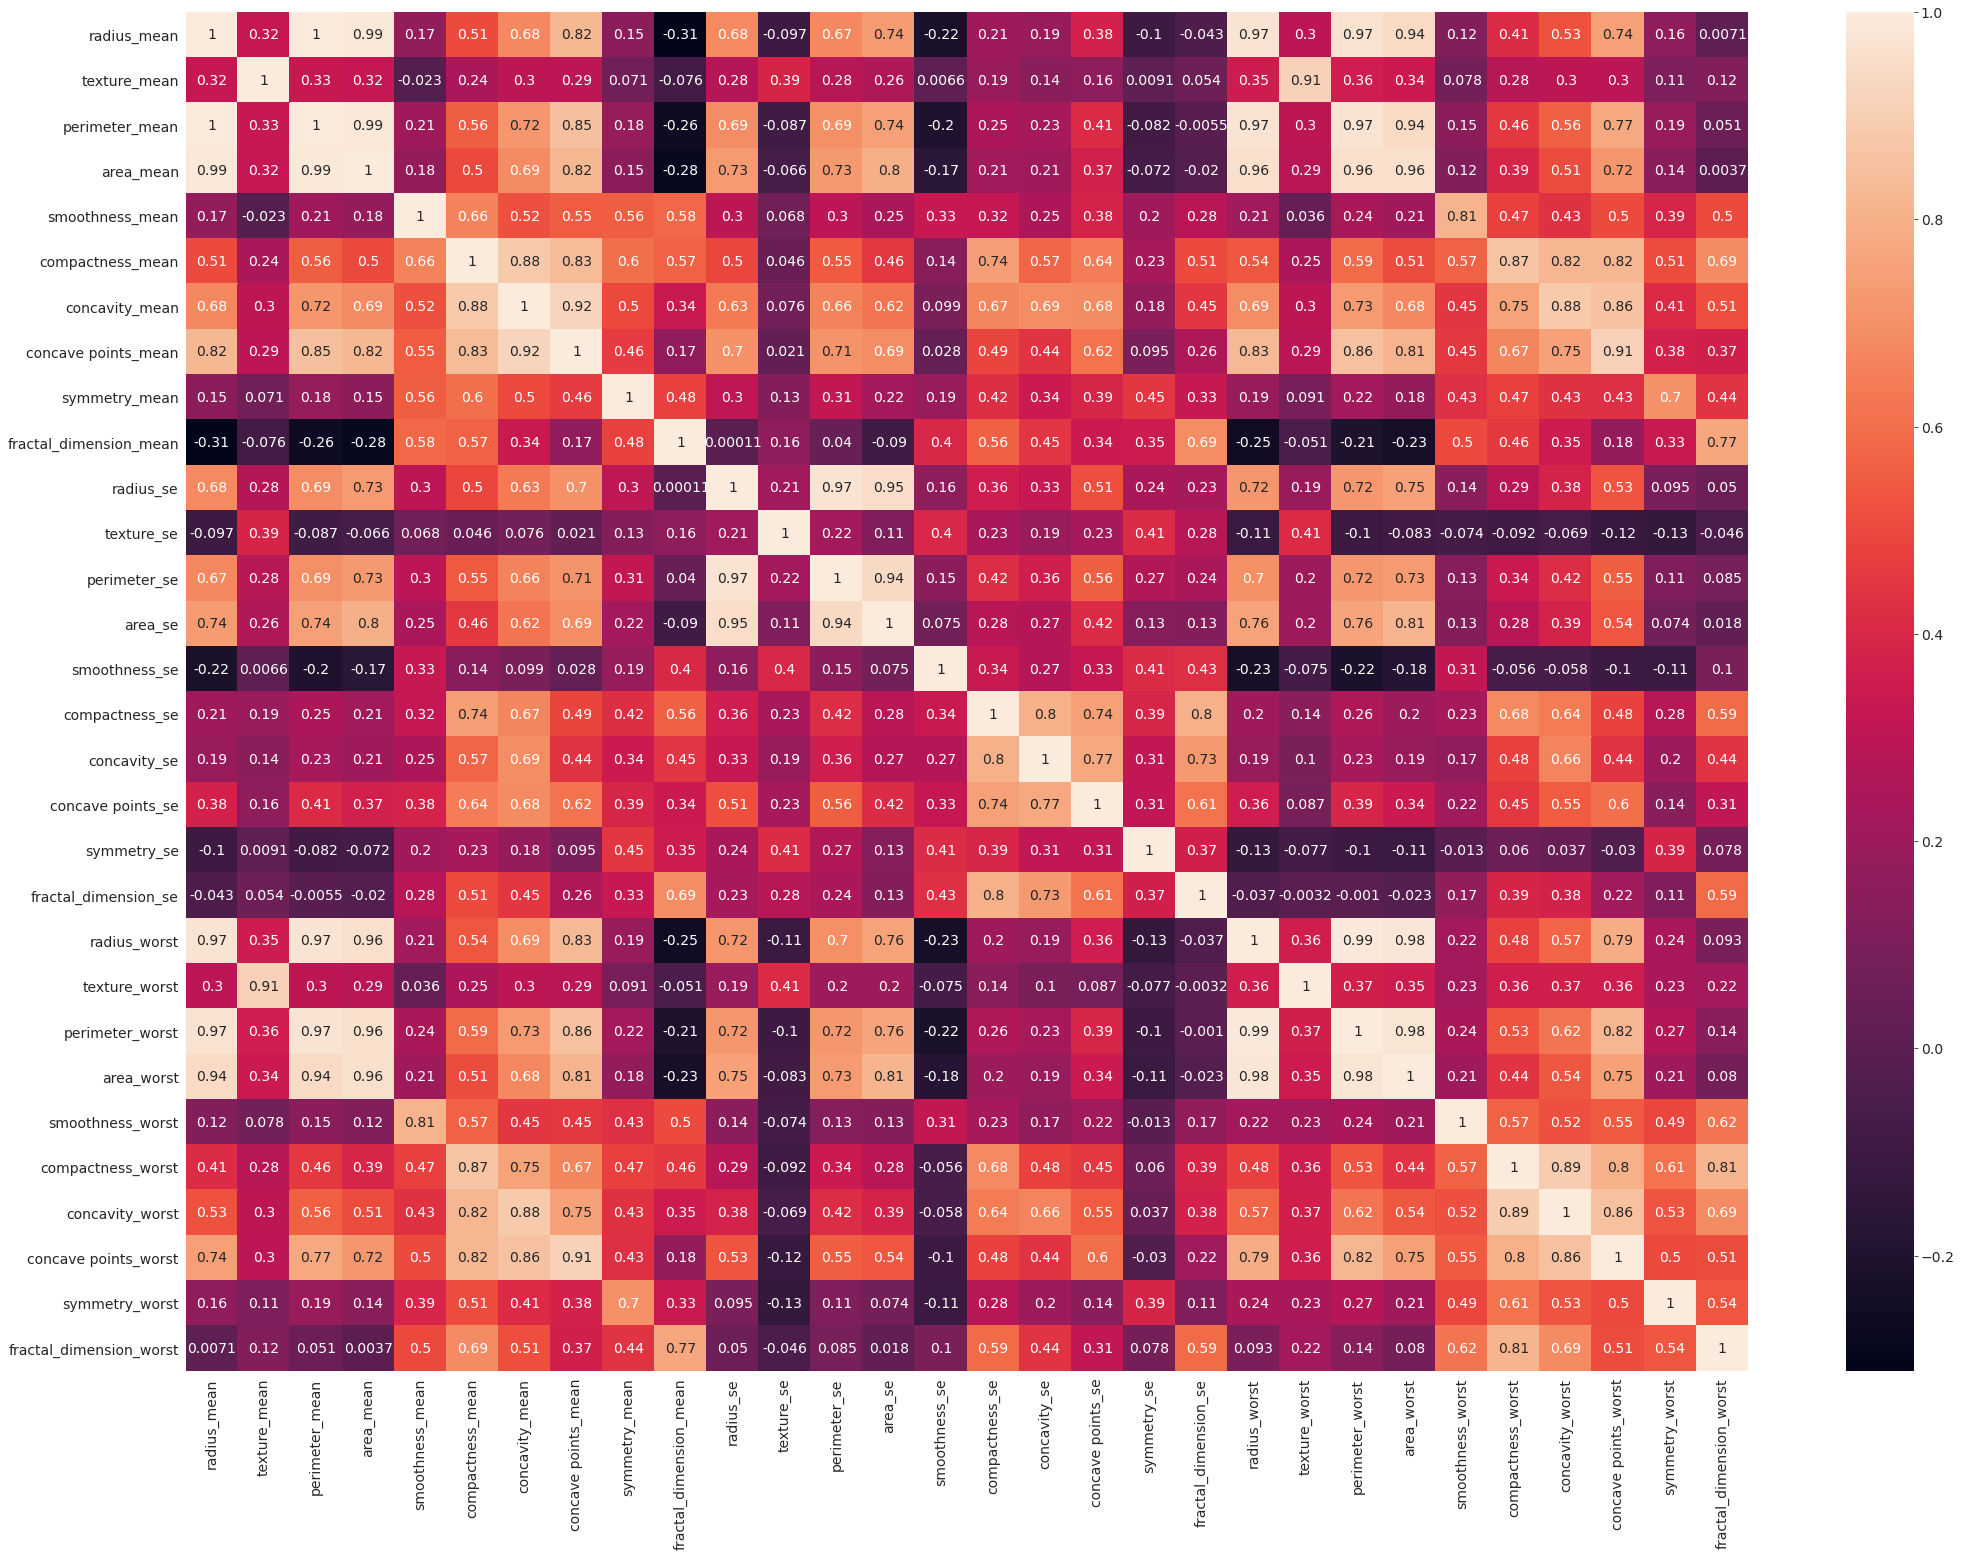

In [15]:
plt.figure(figsize=(35, 25))
sns.heatmap(df.corr(),annot=True);

## 3 - Preparing the data for Machine Learning

#### Defining data for prediction labels

The values we want to predict are in the column 'diagnosis' - these are the labels. We want to predict whether a tumor is malignant ('M') or benign ('B). All the other columns in the dataframe are the predictors for the model:

In [16]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Changing the labels for diagnosis:


In [17]:
lab ={'B':0,'M':1}
df = df.replace({'diagnosis':lab})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
predictors = df.iloc[:, 2:31]
predictors

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
labels = df.iloc[:, 0:1]
labels

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


## 4 - Train/Test data and transformation to tensors

In [20]:
predictors_train, predictors_test, labels_train, labels_test = train_test_split(predictors,labels,test_size = 0.20)

In [21]:
print('Dimensions of the Predictors training dataset {}'.format(predictors_train.shape))
print('Dimensions of the Labels training dataset {}'.format(labels_train.shape))
print('Dimensions of the Predictors test dataset {}'.format(predictors_test.shape))
print('Dimensions of the Labels test dataset {}'.format(labels_test.shape))

Dimensions of the Predictors training dataset (455, 29)
Dimensions of the Labels training dataset (455, 1)
Dimensions of the Predictors test dataset (114, 29)
Dimensions of the Labels test dataset (114, 1)


So far, the data is stored in a pandas dataframe:

In [22]:
type(predictors_train)

pandas.core.frame.DataFrame

We must transform it into an array:

In [23]:
type(np.array(predictors_train))

numpy.ndarray

In [24]:
type(np.array(labels_train))

numpy.ndarray

In [25]:
predictors_train = torch.tensor(np.array(predictors_train), dtype=torch.float)

In [26]:
labels_train = torch.tensor(np.array(labels_train), dtype = torch.float)

In [27]:
df_tf = torch.utils.data.TensorDataset(predictors_train, labels_train)
type(df_tf)

torch.utils.data.dataset.TensorDataset

Pytorch trains the models in mini-batches. There is a class named DataLoader to perform the iterations on the dataset. The batch_size parameter gives the number of samples considered when adjusting the weights of the model.  

In [28]:
train_loader = torch.utils.data.DataLoader(df_tf, batch_size=15, shuffle=True)

## 5 - Implementing and Training the Model

Now, defining the nn model the following way:
* Input features = 29 (we have 29 features in the predictors dataset). 
* Hidden (internal) layers with 15 neurons each
* Output with one neuron, having output labels 0 (benign tumor) and 1 (malignant tumor)
* (29+1)/2 = 15
* ReLU activation function for the internal layers
* Sigmoid activation function for the output layer, returning a probability between 0 and 1

In [29]:
classifier = nn.Sequential(
  
    nn.Linear(in_features=29, out_features=15),
    nn.ReLU(),
    nn.Linear(15, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
    nn.Sigmoid()
)

In [30]:
#To visualize the structure of the neural network:
classifier.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=29, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [31]:
#Binary cross entropy calculation (after weights adjustment)
criterion = nn.BCELoss()

In [32]:
#Using Adam optimizer 
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0.0001)

#### Training the model

In [33]:
for epoch in range(100):
  run_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad()

    outputs = classifier(inputs) # classificador.forward(inputs)
    error = criterion(outputs, labels)
    error.backward()
    optimizer.step() #gradient descent and updating weights

    run_loss += error.item()
  print('Epoch %3d: loss %.5f' % (epoch+1, run_loss/len(train_loader)))

Epoch   1: loss 0.43498
Epoch   2: loss 0.34963
Epoch   3: loss 0.31015
Epoch   4: loss 0.28541
Epoch   5: loss 0.26812
Epoch   6: loss 0.24994
Epoch   7: loss 0.27556
Epoch   8: loss 0.23718
Epoch   9: loss 0.23995
Epoch  10: loss 0.23141
Epoch  11: loss 0.23446
Epoch  12: loss 0.24870
Epoch  13: loss 0.22676
Epoch  14: loss 0.22409
Epoch  15: loss 0.24912
Epoch  16: loss 0.22254
Epoch  17: loss 0.20779
Epoch  18: loss 0.21509
Epoch  19: loss 0.23868
Epoch  20: loss 0.20052
Epoch  21: loss 0.22015
Epoch  22: loss 0.20602
Epoch  23: loss 0.20909
Epoch  24: loss 0.23624
Epoch  25: loss 0.19338
Epoch  26: loss 0.20447
Epoch  27: loss 0.19189
Epoch  28: loss 0.20642
Epoch  29: loss 0.21985
Epoch  30: loss 0.19532
Epoch  31: loss 0.18503
Epoch  32: loss 0.22934
Epoch  33: loss 0.19466
Epoch  34: loss 0.19357
Epoch  35: loss 0.22234
Epoch  36: loss 0.18482
Epoch  37: loss 0.19881
Epoch  38: loss 0.18092
Epoch  39: loss 0.18347
Epoch  40: loss 0.19117
Epoch  41: loss 0.17963
Epoch  42: loss 

## 6 - Model Evalutation

In [34]:
#Visualizing the weights
params = list(classifier.parameters())
#params

In [35]:
#Weights in zero position - from input layer to the first internal layer
w0 = params[0]
w0.shape

torch.Size([15, 29])

In [36]:
#print(w0)

In [37]:
#Bias between both internal layers
bias0 = params[1]
bias0.shape

torch.Size([15])

In [38]:
bias1 = params[3]
bias1.shape

torch.Size([15])

In [39]:
classifier.eval()

Sequential(
  (0): Linear(in_features=29, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
  (5): Sigmoid()
)

In [40]:
type(predictors_test)

pandas.core.frame.DataFrame

In [41]:
predictors_test = torch.tensor(np.array(predictors_test), dtype=torch.float)

In [42]:
type(predictors_test)

torch.Tensor

In [43]:
predictions = classifier.forward(predictors_test)

In [44]:
predictions = np.array(predictions> 0.5)
predictions

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

In [45]:
labels_test

,diagnosis
466,0
342,0
340,0
553,0
511,0
...,...
269,0
493,0
465,0
43,1


In [46]:
acc_rate = accuracy_score(labels_test, predictions)
acc_rate

0.9473684210526315

In [47]:
mat = confusion_matrix(labels_test, predictions)
mat

array([[70,  3],
       [ 3, 38]])

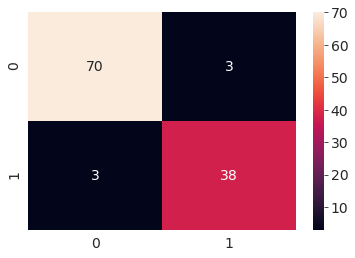

In [48]:
sns.heatmap(mat, annot=True);

We had almost 95% of accuracy of the model. The classifier made a total of 114, from which:
* 67 samples were correctly estimated as benign tumors.
* 41 samples were correctly estimated as malignant tumors.
* There were 4 samples estimated as false negatives, these should have been classified as malignant tumors but were classified as benign. 
* 2 samples were estimated as false positives. 